In [1]:
#BIBLIOTEKI
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statistics as st
from math import sqrt
import scipy.stats as stats
#!pip3 uninstall statsmodels
#!pip3 install numpy scipy patsy pandas
#!pip3 install statsmodels
import statsmodels.api as sm
import seaborn as sns

In [2]:
data = pd.read_excel(r'dane_leki.xlsx')
data = data.drop('Unnamed: 0',axis = 1)

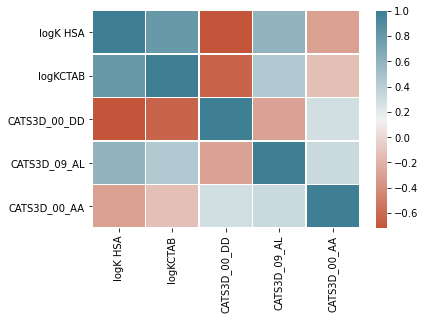

In [3]:
corrM = data.corr()
corrM
ax = sns.heatmap(corrM, linewidth=0.5, cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

In [4]:
treningowy = data.loc[data['Zbiór']=='t']

Y = treningowy['logK HSA']
X = treningowy[['logKCTAB','CATS3D_00_DD','CATS3D_09_AL','CATS3D_00_AA']] 
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               logK HSA   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     14.23
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           7.72e-05
Time:                        20:35:17   Log-Likelihood:                -10.796
No. Observations:                  19   AIC:                             31.59
Df Residuals:                      14   BIC:                             36.31
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8050      0.421      1.914   

C:\Users\48512\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [5]:
#model = 0.8050 + 0.4722 *logKCTAB + (-0.2161)*CATS3D_00_DD + 0.3232*CATS3D_09_AL + (-0.2253)*CATS3D_00_AA

In [6]:
kol = []
for i in range(0,27):
    y = 0.8050 + 0.4722*data.iloc[i,2] - 0.2161*data.iloc[i,3] + 0.3232*data.iloc[i,4] -0.2253*data.iloc[i,5]
    kol.append(y)
print(kol)

[-0.37528599999999995, 0.263784, 0.18215400000000015, 0.45019600000000004, 1.0627, 0.27027200000000007, 0.7193500000000002, 0.9374980000000006, 0.5716120000000001, 0.7083060000000001, 1.7925900000000001, 0.623554, 0.994256, 1.4728500000000002, -1.4370339999999997, -1.267286, 0.06386000000000014, -0.33756600000000003, 1.8834880000000003, -1.247042, 1.3872560000000003, -0.8579779999999999, 2.3151059999999997, 1.524886, 0.29990400000000017, 0.5560340000000001, -1.623446]


In [7]:
data['y_pred'] = kol

In [8]:
#t - trening w - walidacyjny (testowy)

In [9]:
# Q2 - dla zbioru walidacyjnego
walidacyjny = data.loc[data['Zbiór']=='w']

In [10]:
sum_licznik = 0
for element in range(len(walidacyjny)):
    sum_licznik += (walidacyjny.iloc[element][7] - walidacyjny.iloc[element][1])**2

In [11]:
sum_mianownik = 0 
mean = walidacyjny['y_pred'].mean()
for element in range(len(walidacyjny)):
    sum_mianownik += (walidacyjny.iloc[element][7] - mean)**2

In [12]:
Q2EX = 1 - (sum_licznik/sum_mianownik)

In [13]:
RMSEEX = sqrt(sum_licznik/8)

In [14]:
treningowy = data.loc[data['Zbiór']=='t']
sum_licznik_t = 0
for element in range(len(treningowy)):
    sum_licznik_t += (treningowy.iloc[element][7] - treningowy.iloc[element][1])**2

In [15]:
sum_mianownik_t = 0 
mean = treningowy['y_pred'].mean()
for element in range(len(treningowy)):
    sum_mianownik_t += (treningowy.iloc[element][7] - mean)**2

In [16]:
R2 = 1 - (sum_licznik_t / sum_mianownik_t)

In [17]:
RMSEC = sqrt(sum_licznik_t/19)

In [18]:
round(R2,3)

0.754

In [19]:
round(RMSEC,3)

0.427

In [20]:
round(Q2EX,3)

0.949

In [21]:
round(RMSEEX,3)

0.301

In [22]:
walidacyjne = data.loc[data['Zbiór']=='w']
stand_resids = model.resid_pearson
odch = st.stdev(stand_resids)
h = 3*5/19
#p' = 5
#n = 19
#

acetaminophen
acetylsalicylic acid
bromazepam
carbamazepine
chlorpromazine
clonidine
diazepam
diltiazem
diphenhydramine
fluoxetine
flurbiprofen
imipramine
ketoconazole
ketoprofen
metronidazole
nizatidine
propranolol
ranitidine
trazodone
acyclovir
diclofenac
famotidine
ibuprofen
indomethacin
methylprednisolone
quinidine
zidovudine


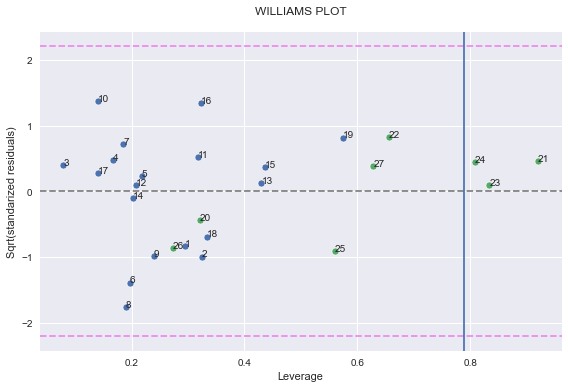

In [23]:
import seaborn as sb

n = treningowy['Nazwa']
lista_tren = []
for element in n:
    lista_tren.append(element)

#wykres Williamsa
residuals = model.resid
stand_resids = model.resid_pearson
influence = model.get_influence()
leverage = influence.hat_matrix_diag
plt.style.use('seaborn')
p=sb.scatterplot(x=leverage, y=stand_resids)

z = leverage
y = stand_resids

for i, txt in enumerate(lista_tren,1):
    p.annotate(i, (z[i-1], y[i-1]))
    print(txt)

p.axhline(y=0, color='grey', linestyle='dashed')
p.set_xlabel('Leverage')
p.set_ylabel('Sqrt(standarized residuals)')
p.set_title('WILLIAMS PLOT\n ', )
p.axhline(odch*2.5, ls = '--',color = '#ed8aed')
p.axhline(-odch*2.5, ls = '--',color = '#ed8aed')
p.axvline(h)

X = pd.DataFrame(walidacyjne[['logKCTAB','CATS3D_00_DD','CATS3D_09_AL','CATS3D_00_AA']])
Y = pd.DataFrame(walidacyjne[['logK HSA']])
X = sm.add_constant(X)
model2 = sm.OLS(Y, X).fit()
residuals2 = model2.resid
stand_resids2 = model2.resid_pearson
influence2 = model2.get_influence()
leverage2 = influence2.hat_matrix_diag
walidacyjny_plot = sb.scatterplot(x=leverage2, y=stand_resids2)

z = leverage2
y = stand_resids2

n = walidacyjny['Nazwa']
lista_walidacyjny = []
for element in n:
    lista_walidacyjny.append(element)

for i, txt in enumerate(lista_walidacyjny,20):
    walidacyjny_plot.annotate(i, (z[i-20], y[i-20]))
    print(txt)

plt.tight_layout()
plt.show()

In [24]:
#NIEBIESKI TRENINGOWY
#ZIELONY WALIDACYJNY / TESTOWY

In [25]:
n = treningowy['logK HSA']
lista_tren = []
for element in n:
    lista_tren.append(element)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

df = pd.DataFrame({'y': list(data['logK HSA']),
                   'x1': list(data['logKCTAB']),
                   'x2': list(data['CATS3D_00_DD']),
                   'x3': list(data['CATS3D_09_AL']),
                   'x4': list(data['CATS3D_00_AA'])})

X = df[['x1', 'x2', 'x3', 'x4']]
y = df['y']

#define cross-validation method to use
cv = LeaveOneOut()

#build multiple linear regression model
model = LinearRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores))) #RMSE

#The lower the RMSE, the more closely a model is able to predict the actual observations.

0.618448853702641

In [26]:
scores

array([-0.39677002, -0.71216328, -0.1837702 , -0.25107393, -0.07480633,
       -0.75350755, -0.33847577, -1.07233243, -0.53574705, -0.8176856 ,
       -0.41367438, -0.08308897, -0.02119438, -0.01125888, -0.23776547,
       -0.75708007, -0.17438857, -0.37344016, -0.81497023, -0.13088448,
       -0.27364999, -0.05618785, -0.36573721, -0.35910324, -0.45649437,
       -0.33106547, -0.33061673])

In [27]:
data

,Nazwa,logK HSA,logKCTAB,CATS3D_00_DD,CATS3D_09_AL,CATS3D_00_AA,Zbiór,y_pred
0,acetaminophen,-0.79,-0.63,2,0,2,t,-0.375286
1,acetylsalicylic acid,-0.23,1.22,1,0,4,t,0.263784
2,bromazepam,0.38,0.57,1,0,3,t,0.182154
3,carbamazepine,0.69,0.68,0,0,3,t,0.450196
4,chlorpromazine,1.18,1.50,0,0,2,t,1.062700
5,clonidine,-0.42,0.26,2,0,1,t,0.270272
6,diazepam,1.08,1.25,0,0,3,t,0.719350
7,diltiazem,0.06,1.09,0,3,6,t,0.937498
8,diphenhydramine,0.08,0.46,0,0,2,t,0.571612
9,fluoxetine,1.39,0.73,1,0,1,t,0.708306


In [28]:
h

0.7894736842105263